In [1]:
!pip install osmnx networkx geopandas shapely folium

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import json
from shapely.geometry import shape, mapping
import geopandas as gpd
import osmnx as ox

Polygon data


In [3]:
geojson = {"type":"Feature","geometry":{"coordinates":[[[112.747286,-7.288063],[112.748487,-7.283211],[112.744353,-7.277027],[112.744224,-7.274006],[112.74667,-7.2709],[112.750403,-7.267709],[112.751261,-7.26571],[112.751827,-7.262948],[112.758211,-7.264859],[112.767049,-7.265454],[112.771211,-7.266688],[112.803747,-7.265502],[112.802459,-7.291208],[112.747286,-7.288063]]],"type":"Polygon"},"properties":{},"id":"yb7By"}

poly = shape(geojson['geometry'])


In [4]:
G = ox.graph_from_polygon(poly, network_type='drive')

# convert edges/nodes to GeoDataFrame jika perlu inspeksi
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Tampilkan unique highway types untuk memutuskan filter
print(gdf_edges['highway'].explode().unique())

['secondary' 'tertiary' 'residential' 'trunk' 'secondary_link'
 'unclassified' 'trunk_link' 'living_street' 'tertiary_link']


In [5]:
gdf_nodes

,y,x,street_count,highway,geometry
osmid,,,,,
257690943,-7.278398,112.755900,4,NaN,POINT (112.7559 -7.2784)
270391758,-7.279453,112.762221,4,NaN,POINT (112.76222 -7.27945)
270391759,-7.280621,112.772023,3,NaN,POINT (112.77202 -7.28062)
270391760,-7.280697,112.780964,4,NaN,POINT (112.78096 -7.2807)
270391762,-7.279457,112.789883,3,NaN,POINT (112.78988 -7.27946)
...,...,...,...,...,...
13057371801,-7.280787,112.755992,3,NaN,POINT (112.75599 -7.28079)
13057371803,-7.280735,112.755906,3,NaN,POINT (112.75591 -7.28073)
13072076213,-7.283565,112.802743,3,NaN,POINT (112.80274 -7.28356)


In [6]:
gdf_edges

osmid        highway lanes  \
u           v          key                                                 
257690943   420895409  0                  687425622      secondary     3   
            3258931753 0                  458026580      secondary     3   
270391758   660853841  0                  223091622      secondary     2   
            2320296821 0                  458012326      secondary     4   
270391759   5563352442 0                   36007557      secondary     3   
...                                             ...            ...   ...   
13072076213 5560915071 0                  297150520       tertiary   NaN   
13077518144 1388588641 0                  119293250    residential   NaN   
            5558617710 0     [119293250, 776902317]    residential     1   
            5558617709 0                  580762505    residential   NaN   
13253888495 5561354818 0    [581153397, 1044739429]  living_street   NaN   

                                                          name  oneway width  \
u           v          key                                                     
257690943   420895409  0                       Jalan Kertajaya    True     4   
            3258931753 0                    Jalan Dharmawangsa    True   NaN   
270391758   660853841  0                      Jalan Raya Menur    True   NaN   
            2320296821 0                       Jalan Kertajaya    True     4   
270391759   5563352442 0                Jalan Manyar Kertoarjo    True   NaN   
...                                                        ...     ...   ...   
13072076213 5560915071 0            Jalan Kejawan Putih Tambak   False   NaN   
13077518144 1388588641 0                    Jalan Gebang Wetan   False     4   
            5558617710 0    [Jalan Gebang Wetan, Gebang Kidul]   False     4   
            5558617709 0                                   NaN   False   NaN   
13253888495 5561354818 0                                   NaN   False   NaN   

                                 reversed      length  \
u           v          key                              
257690943   420895409  0            False   14.758075   
            3258931753 0            False   54.983811   
270391758   660853841  0            False   19.949080   
            2320296821 0            False   35.135936   
270391759   5563352442 0            False  231.123310   
...                                   ...         ...   
13072076213 5560915071 0             True   28.268256   
13077518144 1388588641 0            False    1.894448   
            5558617710 0    [False, True]  218.358451   
            5558617709 0             True   91.429310   
13253888495 5561354818 0             True   52.303064   

                                                                     geometry  \
u           v          key                                                      
257690943   420895409  0    LINESTRING (112.7559 -7.2784, 112.75577 -7.27838)   
            3258931753 0    LINESTRING (112.7559 -7.2784, 112.7559 -7.2785...   
270391758   660853841  0    LINESTRING (112.76222 -7.27945, 112.76224 -7.2...   
            2320296821 0    LINESTRING (112.76222 -7.27945, 112.76191 -7.2...   
270391759   5563352442 0    LINESTRING (112.77202 -7.28062, 112.77197 -7.2...   
...                                                                       ...   
13072076213 5560915071 0    LINESTRING (112.80274 -7.28356, 112.80278 -7.2...   
13077518144 1388588641 0    LINESTRING (112.78894 -7.28197, 112.78894 -7.2...   
            5558617710 0    LINESTRING (112.78894 -7.28197, 112.78898 -7.2...   
            5558617709 0    LINESTRING (112.78894 -7.28197, 112.78905 -7.2...   
13253888495 5561354818 0    LINESTRING (112.76533 -7.27303, 112.76536 -7.2...   

                           junction bridge      access maxspeed  
u           v          key                                       
257690943   420895409  0        NaN    NaN         NaN      NaN  
            3258931753

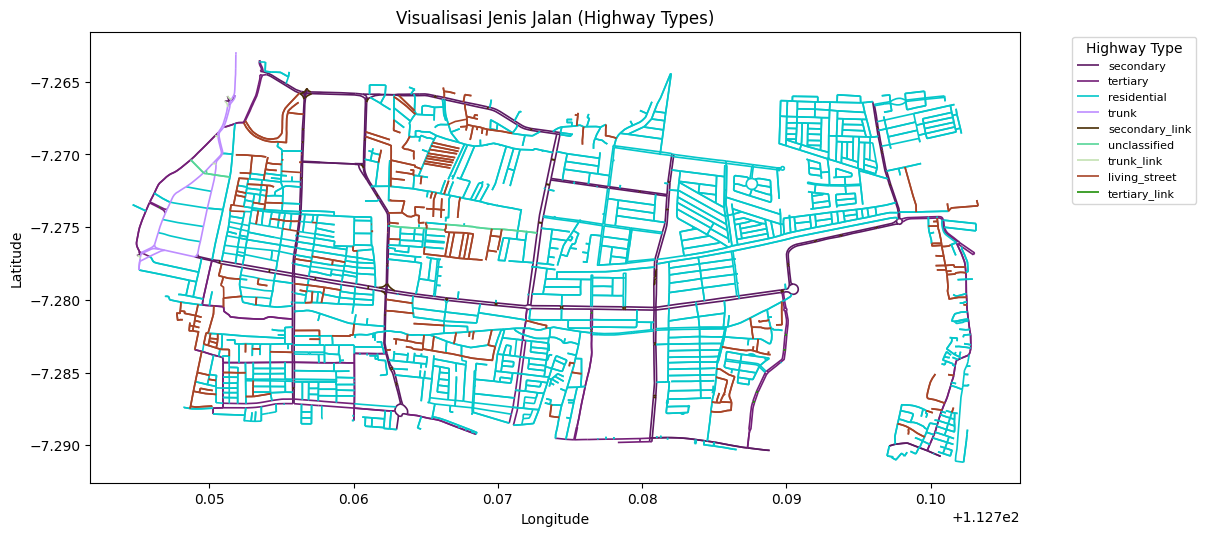

In [7]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import random

# Convert graph to GeoDataFrames

# Pastikan kolom highway adalah list → ubah menjadi string tipe pertama
def get_hw_type(hw):
    if isinstance(hw, list):
        return hw[0]
    return hw

def viz_graph(G):
  gdf_nodes, gdf_edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

  gdf_edges['hw_type'] = gdf_edges['highway'].apply(get_hw_type)

  hw_types = gdf_edges['hw_type'].unique()

  colors = {hw: "#"+''.join(random.choices('0123456789ABCDEF', k=6)) for hw in hw_types}

  fig, ax = plt.subplots(figsize=(12, 12))
  for hw in hw_types:
      subset = gdf_edges[gdf_edges['hw_type'] == hw]
      subset.plot(ax=ax, linewidth=1.2, color=colors[hw], label=hw)

  plt.title("Visualisasi Jenis Jalan (Highway Types)")
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")

  plt.legend(title="Highway Type", fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')

  plt.show()

viz_graph(G)


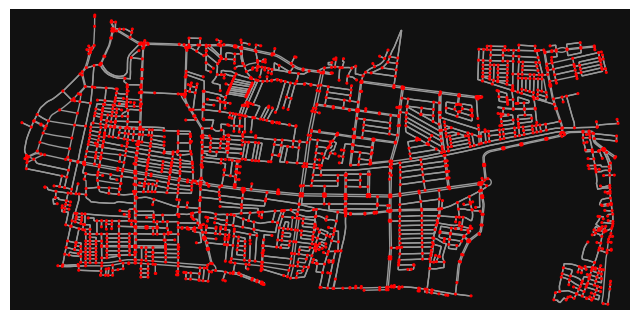

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [8]:
ox.plot_graph(G, node_size=5, node_color="red")

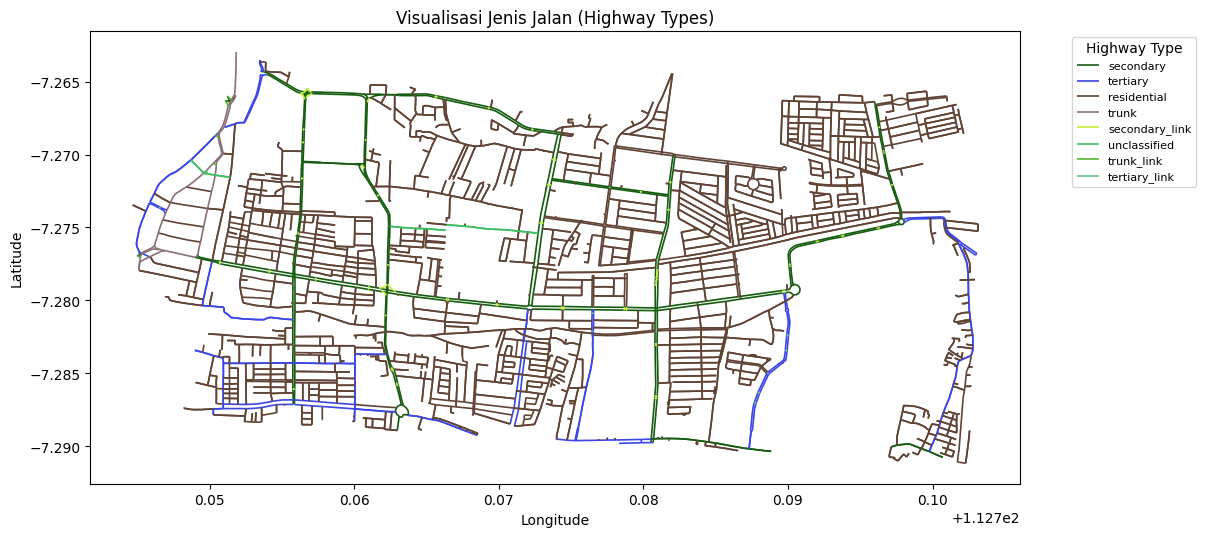

In [9]:
bad_types = {'living_street'}
mask = gdf_edges['highway'].apply(lambda x: any(ht in bad_types for ht in (x if isinstance(x,list) else [x])))
edges_to_drop = gdf_edges[mask]
# drop dari graph

for u,v,k in edges_to_drop.index:
    if G.has_edge(u,v,key=k):
        G.remove_edge(u,v,key=k)

# viz graph
viz_graph(G)

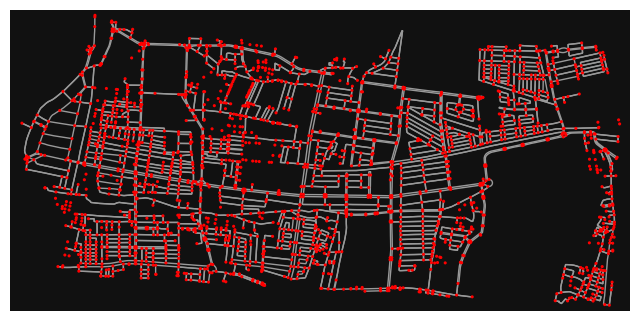

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
ox.plot_graph(G, node_size=5, node_color="red")

In [11]:
hospital_gds = ox.features_from_polygon(poly, tags={'amenity':'hospital'})
hospital_gds

geometry  \
element id                                                             
way     194433170  POLYGON ((112.77957 -7.28269, 112.77975 -7.282...   
        257897278  POLYGON ((112.78431 -7.26995, 112.7855 -7.2701...   
        307282253  POLYGON ((112.76108 -7.28553, 112.76155 -7.287...   
        320182744  POLYGON ((112.78654 -7.27019, 112.78665 -7.269...   
        429077947  POLYGON ((112.74479 -7.27361, 112.74498 -7.273...   
        447609697  POLYGON ((112.75161 -7.26515, 112.7517 -7.2651...   
        448319033  POLYGON ((112.75708 -7.26529, 112.75775 -7.265...   
        449624602  POLYGON ((112.75613 -7.26446, 112.75616 -7.264...   
        449903849  POLYGON ((112.7528 -7.28304, 112.75295 -7.2830...   
        450513383  POLYGON ((112.74599 -7.27418, 112.74617 -7.273...   
        463561564  POLYGON ((112.74883 -7.27833, 112.74906 -7.278...   
        464566820  POLYGON ((112.75674 -7.26622, 112.75678 -7.266...   

                  access:roof                               addr:city  \
element id                                                              
way     194433170         yes      Klampis Ngasem, Sukolilo, Surabaya   
        257897278         NaN                                Surabaya   
        307282253         NaN  Kertajaya, Gubeng, Surabaya, East Java   
        320182744         NaN                                Surabaya   
        429077947         NaN                                     NaN   
        447609697         NaN                                     NaN   
        448319033         NaN                                     NaN   
        449624602         yes     Kota Surabaya, Jawa Timur Indonesia   
        449903849         NaN  Kertajaya, Gubeng, Surabaya, East Java   
        450513383         NaN             Gubeng, Surabaya, East Java   
        463561564         yes                                     NaN   
        464566820         NaN                                Surabaya   

                  addr:postcode  \
element id                        
way     194433170         60117   
        257897278         60115   
        307282253           NaN   
        320182744         60115   
        429077947           NaN   
        447609697           NaN   
        448319033           NaN   
        449624602         60131   
        449903849         60282   
        450513383         60281   
        463561564           NaN   
        464566820           NaN   

                                                         addr:street  \
element id                                                             
way     194433170                                Jl. Manyar Kertoadi   
        257897278                     Jalan Dharmahusada Indah Utara   
        307282253                                                NaN   
        320182744                                      Jl. Mulyorejo   
        429077947                                                NaN   
        447609697                                                NaN   
        448319033                                                NaN   
        449624602                           Jalan Prof. Dr. Moestopo   
        449903849                                     JL. Pucang Adi   
        450513383  Jalan Raya Gubeng, Kelurahan Gubeng, Kecamatan...   
        463561564                                                NaN   
        464566820                                                NaN   

                    amenity  building building:levels building:roof  \
element id                                                            
way     194433170  hospital  hospital               3          tile   
        257897278  hospital  hospital               7           NaN   
        307282253  hospital       NaN             NaN           NaN   
        320182744  hospital  hospital               7           NaN   
        429077947  hospital       yes             NaN           NaN   
        447609697  hospital    

In [12]:
hospital_gds.columns

Index(['geometry', 'access:roof', 'addr:city', 'addr:postcode', 'addr:street',
       'amenity', 'building', 'building:levels', 'building:roof',
       'building:structure', 'building:walls', 'email', 'fax', 'healthcare',
       'name', 'operator:type', 'phone', 'website', 'emergency', 'short_name',
       'addr:full', 'addr:housenumber', 'backup_generator',
       'building:condition', 'building:floor', 'capacity:persons',
       'official_name'],
      dtype='object')

In [13]:
hospitals = hospital_gds[hospital_gds['name'].isin(['RSUD Dr. Soetomo', 'Siloam Hospitals','RSU Haji Surabaya','Rumah Sakit Universitas Airlangga','RSIA Ferina Surabaya'])].loc[:, ['name', 'geometry']]
# hospitals = hospital_gds.loc[:, ['name', 'geometry']]
# hospitals = hospital_gds

In [14]:
hospitals

name  \
element id                                             
way     194433170                  RSU Haji Surabaya   
        257897278  Rumah Sakit Universitas Airlangga   
        429077947               RSIA Ferina Surabaya   
        450513383                   Siloam Hospitals   
        464566820                   RSUD Dr. Soetomo   

                                                            geometry  
element id                                                            
way     194433170  POLYGON ((112.77957 -7.28269, 112.77975 -7.282...  
        257897278  POLYGON ((112.78431 -7.26995, 112.7855 -7.2701...  
        429077947  POLYGON ((112.74479 -7.27361, 112.74498 -7.273...  
        450513383  POLYGON ((112.74599 -7.27418, 112.74617 -7.273...  
        464566820  POLYGON ((112.75674 -7.26622, 112.75678 -7.266...

In [15]:
hospitals['centroid'] = hospitals['geometry'].centroid
hospitals_points = hospitals[['name', 'centroid']]
hospitals_points["x"] = hospitals_points["centroid"].x
hospitals_points["y"] = hospitals_points["centroid"].y
hospitals_points

C:\Users\dumpt\AppData\Local\Temp\ipykernel_8340\715088377.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hospitals['centroid'] = hospitals['geometry'].centroid


name  \
element id                                             
way     194433170                  RSU Haji Surabaya   
        257897278  Rumah Sakit Universitas Airlangga   
        429077947               RSIA Ferina Surabaya   
        450513383                   Siloam Hospitals   
        464566820                   RSUD Dr. Soetomo   

                                     centroid           x         y  
element id                                                           
way     194433170  POINT (112.77983 -7.28281)  112.779827 -7.282813  
        257897278  POINT (112.78492 -7.26982)  112.784922 -7.269821  
        429077947  POINT (112.74483 -7.27375)  112.744828 -7.273755  
        450513383  POINT (112.74639 -7.27403)  112.746392 -7.274031  
        464566820  POINT (112.75818 -7.26821)  112.758183 -7.268213

In [16]:
hospitals_points['load_percentage'] = 100
hospitals_points['load_percentage'][3] = 10
hospitals_points['load_percentage'][4] = 15
# hospitals_points['load_percentage'][] = 10
hospitals_points['wait_time'] = (hospitals_points['load_percentage'] / 100) * 500
hospitals_points

C:\Users\dumpt\AppData\Local\Temp\ipykernel_8340\2699294547.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  hospitals_points['load_percentage'][3] = 10
C:\Users\dumpt\AppData\Local\Temp\ipykernel_8340\2699294547.py:2: SettingWithCopyWarn

name  \
element id                                             
way     194433170                  RSU Haji Surabaya   
        257897278  Rumah Sakit Universitas Airlangga   
        429077947               RSIA Ferina Surabaya   
        450513383                   Siloam Hospitals   
        464566820                   RSUD Dr. Soetomo   

                                     centroid           x         y  \
element id                                                            
way     194433170  POINT (112.77983 -7.28281)  112.779827 -7.282813   
        257897278  POINT (112.78492 -7.26982)  112.784922 -7.269821   
        429077947  POINT (112.74483 -7.27375)  112.744828 -7.273755   
        450513383  POINT (112.74639 -7.27403)  112.746392 -7.274031   
        464566820  POINT (112.75818 -7.26821)  112.758183 -7.268213   

                   load_percentage  wait_time  
element id                                     
way     194433170              100      500.0  
        257897278              100      500.0  
        429077947              100      500.0  
        450513383               10       50.0  
        464566820               15       75.0

In [17]:
test = gdf_edges.reset_index(drop=False)
test[(test['u'] == 450513383) | (test['v'] == 450513383)]

,u,v,key,osmid,highway,lanes,name,oneway,width,reversed,length,geometry,junction,bridge,access,maxspeed


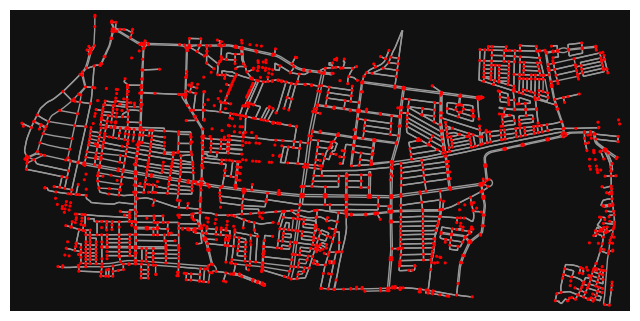

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [18]:
for idx, row in hospitals_points.iterrows():
    nearest_node = ox.nearest_nodes(G, row['x'], row['y'])

    G.add_node(idx[1], x=row['x'], y=row['y'], load_percentage=row['load_percentage'])

    G.add_edge(idx[1], nearest_node, length=0)
    G.add_edge(nearest_node, idx[1], length=0)

ox.plot_graph(G, node_size=5, node_color="red")


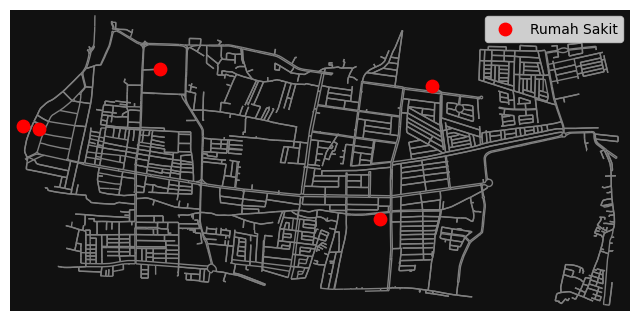

In [19]:
fig, ax = ox.plot_graph(G, node_size=0, edge_color="gray", show=False, close=False)

hospital_x = hospitals_points['x'].values
hospital_y = hospitals_points['y'].values

ax.scatter(hospital_x, hospital_y, c='red', s=80, label='Rumah Sakit', zorder=5)
ax.legend()
plt.show()

In [20]:
idx_hospitals = hospitals.reset_index(drop=False)['id']
idx_hospitals.values

array([194433170, 257897278, 429077947, 450513383, 464566820])

In [21]:
for u, v, k, data in G.edges(keys=True, data=True):

  if u in idx_hospitals.values or v in idx_hospitals.values:
    data['speed_limit'] = 100
  else:
    data['speed_limit'] = random.choice([100,60,40,20,10,5,1])
  data['cost'] = (data['length']) / (data['speed_limit'] * 1000 / 3600)

  if "load_percentage" in G.nodes[v]:
    print(v)
    load =  (G.nodes[v]['load_percentage'] / 100)
    const_increaser = 1000
    load =  (G.nodes[v]['load_percentage'] / 100) * const_increaser
    G.nodes[v]['wait_time'] = load 
    data['cost'] = load # karena length rs ke node terdekat 0

  # print(u, v, k, data)

257897278
429077947
194433170
464566820
450513383


In [64]:
def generate_node_korban(lat, long):
  nearest_node = ox.nearest_nodes(G, long, lat)
  print(type(nearest_node))
  korban_node = random.randint(1000, 9999)
  G.add_node(korban_node, x=long, y=lat)
  G.add_edge(nearest_node, korban_node, length=0)
  G.add_edge(korban_node, nearest_node, length=0)
  return korban_node

korban_lat = -7.269072449827058
korban_long = 112.76079654693605

korban_lat = -7.273844
korban_long = 112.745561


korban_lat = -7.279070
korban_long = 112.790351

korban_lat = -7.281311
korban_long = 112.755946

korban_lat = -7.272480,
korban_long = 112.765108

korban_lat = -7.280612
korban_long = 112.780833

korban_lat = -7.272162
korban_long = 112.777660

# korban_lat = -7.272755
# korban_long = 112.766585


korban_node = generate_node_korban(korban_lat, korban_long)
korban_node

<class 'int'>


7025

In [23]:
for u, v, k, data in G.edges(keys=True, data=True):

  print(u, v, k, data)

257690943 420895409 0 {'osmid': 687425622, 'highway': 'secondary', 'lanes': '3', 'name': 'Jalan Kertajaya', 'oneway': True, 'width': '4', 'reversed': False, 'length': np.float64(14.75807467543156), 'speed_limit': 10, 'cost': np.float64(5.312906883155362)}
257690943 3258931753 0 {'osmid': 458026580, 'highway': 'secondary', 'lanes': '3', 'name': 'Jalan Dharmawangsa', 'oneway': True, 'reversed': False, 'length': np.float64(54.98381127225096), 'geometry': <LINESTRING (112.756 -7.278, 112.756 -7.279, 112.756 -7.279)>, 'speed_limit': 1, 'cost': np.float64(197.94172058010344)}
270391758 660853841 0 {'osmid': 223091622, 'highway': 'secondary', 'lanes': '2', 'name': 'Jalan Raya Menur', 'oneway': True, 'reversed': False, 'length': np.float64(19.949079767564392), 'speed_limit': 40, 'cost': np.float64(1.7954171790807953)}
270391758 2320296821 0 {'osmid': 458012326, 'highway': 'secondary', 'lanes': '4', 'name': 'Jalan Kertajaya', 'oneway': True, 'width': '4', 'reversed': False, 'length': np.float64

In [24]:
korban_node

7618

In [25]:
hospitals_data = hospitals.reset_index(drop=False)
hospitals_data
# hospitals_data[hospitals_data['id'] == best_hospital]['name'].values[0]

,element,id,name,geometry,centroid
0,way,194433170,RSU Haji Surabaya,"POLYGON ((112.77957 -7.28269, 112.77975 -7.282...",POINT (112.77983 -7.28281)
1,way,257897278,Rumah Sakit Universitas Airlangga,"POLYGON ((112.78431 -7.26995, 112.7855 -7.2701...",POINT (112.78492 -7.26982)
2,way,429077947,RSIA Ferina Surabaya,"POLYGON ((112.74479 -7.27361, 112.74498 -7.273...",POINT (112.74483 -7.27375)
3,way,450513383,Siloam Hospitals,"POLYGON ((112.74599 -7.27418, 112.74617 -7.273...",POINT (112.74639 -7.27403)
4,way,464566820,RSUD Dr. Soetomo,"POLYGON ((112.75674 -7.26622, 112.75678 -7.266...",POINT (112.75818 -7.26821)


## A* networkx Built-in5

In [26]:
import math
import networkx as nx
import numpy as np

#korban_node = 1145
rs_node = hospitals_data['id'].values

def haversine(lat1, lon1, lat2, lon2):
    R = 6371000
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1-a))

def build_avg_speed(G):
    speeds = []
    for u, v, data in G.edges(data=True):
        if 'speed_limit' in data:
            speeds.append(data['speed_limit'] * 1000 / 3600)  # km/h → m/s
    return np.mean(speeds)

def make_heuristic(G):
    avg_speed = build_avg_speed(G)
    def heuristic(n, goal):
        x1, y1 = G.nodes[n]['x'], G.nodes[n]['y']
        x2, y2 = G.nodes[goal]['x'], G.nodes[goal]['y']
        dist = haversine(y1, x1, y2, x2)
        return dist / avg_speed
    return heuristic

heur = make_heuristic(G)

best_cost = float('inf')
best_route = None
best_hospital = None

for rs in rs_node:

    # RS → Korban
    r1 = nx.astar_path(G, rs, korban_node, heuristic=lambda n, goal=korban_node: heur(n, goal), weight='cost')
    c1 = nx.astar_path_length(G, rs, korban_node, heuristic=lambda n, goal=korban_node: heur(n, goal), weight='cost')

    # Korban → RS
    r2 = nx.astar_path(G, korban_node, rs, heuristic=lambda n, goal=rs: heur(n, goal), weight='cost')
    c2 = nx.astar_path_length(G, korban_node, rs, heuristic=lambda n, goal=rs: heur(n, goal), weight='cost')

    total_cost = c1 + c2

    print(f"RS {hospitals_data[hospitals_data['id'] == rs]['name'].values[0]}: total waktu tempuh = {total_cost:.2f} detik")

    if total_cost < best_cost:
        best_cost = total_cost
        best_hospital = rs
        best_route = r1 + r2[1:]

print("\n=== HASIL TERBAIK ===")
print(f"Rumah Sakit terbaik → {hospitals_data[hospitals_data['id'] == best_hospital]['name'].values[0]}")
print(f"Total waktu tempuh → {best_cost:.2f} detik")
print(f"Total node dilalui → {len(best_route)}")


RS RSU Haji Surabaya: total waktu tempuh = 2388.74 detik
RS Rumah Sakit Universitas Airlangga: total waktu tempuh = 1863.53 detik
RS RSIA Ferina Surabaya: total waktu tempuh = 4361.14 detik
RS Siloam Hospitals: total waktu tempuh = 3370.55 detik
RS RSUD Dr. Soetomo: total waktu tempuh = 2788.73 detik

=== HASIL TERBAIK ===
Rumah Sakit terbaik → Rumah Sakit Universitas Airlangga
Total waktu tempuh → 1863.53 detik
Total node dilalui → 56


In [27]:
# if 'id' is a column in the index, reset_index to expose it
hospital_ids = hospitals.reset_index(drop=False)['id']
arr_hospitals_ids = hospital_ids.values.tolist()
arr_hospitals_ids

[194433170, 257897278, 429077947, 450513383, 464566820]

## A* heapq

In [28]:
import heapq
import math
import numpy as np

def astar_func(G, start, goal, heuristic):
    pq = [(0, 0, start, [start])]
    visited = {}

    while pq:
        est_total, cost_so_far, current, path = heapq.heappop(pq)

        if current == goal:
            return path, cost_so_far

        if current in visited and visited[current] <= cost_so_far:
            continue

        visited[current] = cost_so_far

        for neighbor in G.neighbors(current):
            data = G[current][neighbor]
            edge_cost = data.get("cost", 1)

            new_cost = cost_so_far + edge_cost
            est = new_cost + heuristic(neighbor, goal)

            heapq.heappush(pq, (est, new_cost, neighbor, path + [neighbor]))

    return None, float("inf")


#korban_node = 1145
rs_node = arr_hospitals_ids

def haversine(lat1, lon1, lat2, lon2):
    R = 6371000
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1-a))

def build_avg_speed(G):
    speeds = []
    for u, v, data in G.edges(data=True):
        if 'speed_limit' in data:
            speeds.append(data['speed_limit'] * 1000 / 3600)  # km/h → m/s
    return np.mean(speeds)

def make_heuristic(G):
    avg_speed = build_avg_speed(G)
    def heuristic(n, goal):
        x1, y1 = G.nodes[n]['x'], G.nodes[n]['y']
        x2, y2 = G.nodes[goal]['x'], G.nodes[goal]['y']
        dist = haversine(y1, x1, y2, x2)
        return dist / avg_speed
    return heuristic

heur = make_heuristic(G)

best_cost = float('inf')
best_route = None
best_hospital = None

for rs in rs_node:

    r1, c1 = astar_func(G, rs, korban_node, heuristic=heur)

    r2,c2 = astar_func(G, korban_node, rs, heuristic=heur)

    total_cost = c1 + c2

    print(f"RS {hospitals_data[hospitals_data['id'] == rs]['name'].values[0]}: total waktu tempuh = {total_cost:.2f} detik")

    if total_cost < best_cost:
        best_cost = total_cost
        best_hospital = rs
        best_route = r1 + r2[1:]

print("\n=== HASIL TERBAIK ===")
print(f"Rumah Sakit terbaik → {hospitals_data[hospitals_data['id'] == best_hospital]['name'].values[0]}")
print(f"Total waktu tempuh → {best_cost:.2f} detik")
print(f"Total node dilalui → {len(best_route)}")


RS RSU Haji Surabaya: total waktu tempuh = 77.00 detik
RS Rumah Sakit Universitas Airlangga: total waktu tempuh = 31.00 detik
RS RSIA Ferina Surabaya: total waktu tempuh = 180.00 detik
RS Siloam Hospitals: total waktu tempuh = 175.00 detik
RS RSUD Dr. Soetomo: total waktu tempuh = 89.00 detik

=== HASIL TERBAIK ===
Rumah Sakit terbaik → Rumah Sakit Universitas Airlangga
Total waktu tempuh → 31.00 detik
Total node dilalui → 32


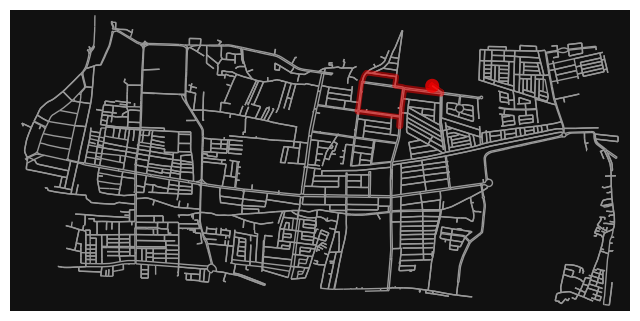

In [29]:
fig, ax = ox.plot_graph_route(
    G, best_route,
    route_color='red',
    route_linewidth=4,
    node_size=0
)


## Compare Algorithms

In [62]:
hospitals_data = hospitals.reset_index(drop=False)
hospitals_data['id'].values

array([194433170, 257897278, 429077947, 450513383, 464566820])

In [31]:
from collections import deque
import heapq

#korban_node = 1145
rs_node = hospitals_data['id'].values

def ucs(G, start, goal):
    pq = [(0, start, [start])]
    visited = {}

    while pq:
        cost_so_far, current, path = heapq.heappop(pq)

        if current == goal:
            return path, cost_so_far

        if current in visited and visited[current] <= cost_so_far:
            continue

        visited[current] = cost_so_far

        for neighbor in G.neighbors(current):
            edge_cost = G[current][neighbor].get("cost", 1)
            new_cost = cost_so_far + edge_cost
            heapq.heappush(pq, (new_cost, neighbor, path + [neighbor]))

    return None, float("inf")


def dijkstra_search(G, start, goal):
    path = nx.dijkstra_path(G, start, goal, weight="cost")
    cost = nx.dijkstra_path_length(G, start, goal, weight="cost")
    return path, cost

def astar_func(G, start, goal, heuristic):
    pq = [(0, 0, start, [start])]
    visited = {}

    while pq:
        est_total, cost_so_far, current, path = heapq.heappop(pq)

        if current == goal:
            return path, cost_so_far

        if current in visited and visited[current] <= cost_so_far:
            continue

        visited[current] = cost_so_far

        for neighbor in G.neighbors(current):
            data = G[current][neighbor]
            edge_cost = data.get("cost", 1)

            new_cost = cost_so_far + edge_cost
            est = new_cost + heuristic(neighbor, goal)

            heapq.heappush(pq, (est, new_cost, neighbor, path + [neighbor]))

    return None, float("inf")

def haversine(lat1, lon1, lat2, lon2):
    R = 6371000
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1-a))

def build_avg_speed(G):
    speeds = []
    for u, v, data in G.edges(data=True):
        if 'speed_limit' in data:
            speeds.append(data['speed_limit'] * 1000 / 3600)  # km/h → m/s
    return np.mean(speeds)

def make_heuristic(G):
    avg_speed = build_avg_speed(G)
    def heuristic(n, goal):
        x1, y1 = G.nodes[n]['x'], G.nodes[n]['y']
        x2, y2 = G.nodes[goal]['x'], G.nodes[goal]['y']
        dist = haversine(y1, x1, y2, x2)
        return dist / avg_speed
    return heuristic

heur = make_heuristic(G)


algos = ["A*", "UCS"]

algo_costs = dict()

for algo in algos:
    best_cost = float('inf')
    best_route = None
    best_hospital = None

    print(f"Algorithm: {algo}")
    algo_costs[algo] = {}
    for rs in rs_node:
        if algo == "A*":
          r1, c1 = astar_func(G, rs, korban_node, heuristic=heur)
          r2,c2 = astar_func(G, korban_node, rs, heuristic=heur)
          total_cost = c1 + c2
        elif algo == "UCS":
          r1, c1 = ucs(G, rs, korban_node)
          r2,c2 = ucs(G, korban_node, rs)
          total_cost = c1 + c2
        elif algo == "Dijkstra":
          r1, c1 = dijkstra_search(G, rs, korban_node)
          r2,c2 = dijkstra_search(G, korban_node, rs)
          total_cost = c1 + c2

        print(f"RS {hospitals_data[hospitals_data['id'] == rs]['name'].values[0]}: total waktu tempuh = {total_cost:.2f} detik")

        if total_cost < best_cost:
            best_cost = total_cost
            best_hospital = rs
            best_route = r1 + r2[1:]

    print("=== HASIL ===")
    print(f"Rumah Sakit terbaik → {hospitals_data[hospitals_data['id'] == best_hospital]['name'].values[0]}")
    print(f"Total waktu tempuh → {best_cost:.2f} detik")
    print(f"Total node dilalui → {len(best_route)}")
    print("="*60)
    algo_costs[algo]['cost'] = best_cost
    algo_costs[algo]['route'] = best_route
    algo_costs[algo]['hospital'] = hospitals_data[hospitals_data['id'] == best_hospital]['name'].values[0]

sorted_cost_algos =  sorted(algo_costs.items(), key=lambda x: x[1]['cost'])
print(f"Best Algorithm: {sorted_cost_algos[0][0]}")
print(f"Best Cost: {sorted_cost_algos[0][1]['cost']}")
print(f"Best Hospital: {sorted_cost_algos[0][1]['hospital']}")
best_route = sorted_cost_algos[0][1]['route']





Algorithm: A*
RS RSU Haji Surabaya: total waktu tempuh = 77.00 detik
RS Rumah Sakit Universitas Airlangga: total waktu tempuh = 31.00 detik
RS RSIA Ferina Surabaya: total waktu tempuh = 180.00 detik
RS Siloam Hospitals: total waktu tempuh = 175.00 detik
RS RSUD Dr. Soetomo: total waktu tempuh = 89.00 detik
=== HASIL ===
Rumah Sakit terbaik → Rumah Sakit Universitas Airlangga
Total waktu tempuh → 31.00 detik
Total node dilalui → 32
Algorithm: UCS
RS RSU Haji Surabaya: total waktu tempuh = 50.00 detik
RS Rumah Sakit Universitas Airlangga: total waktu tempuh = 27.00 detik
RS RSIA Ferina Surabaya: total waktu tempuh = 112.00 detik
RS Siloam Hospitals: total waktu tempuh = 107.00 detik
RS RSUD Dr. Soetomo: total waktu tempuh = 71.00 detik
=== HASIL ===
Rumah Sakit terbaik → Rumah Sakit Universitas Airlangga
Total waktu tempuh → 27.00 detik
Total node dilalui → 28
Best Algorithm: UCS
Best Cost: 27
Best Hospital: Rumah Sakit Universitas Airlangga


In [32]:
hospitals_points

name  \
element id                                             
way     194433170                  RSU Haji Surabaya   
        257897278  Rumah Sakit Universitas Airlangga   
        429077947               RSIA Ferina Surabaya   
        450513383                   Siloam Hospitals   
        464566820                   RSUD Dr. Soetomo   

                                     centroid           x         y  \
element id                                                            
way     194433170  POINT (112.77983 -7.28281)  112.779827 -7.282813   
        257897278  POINT (112.78492 -7.26982)  112.784922 -7.269821   
        429077947  POINT (112.74483 -7.27375)  112.744828 -7.273755   
        450513383  POINT (112.74639 -7.27403)  112.746392 -7.274031   
        464566820  POINT (112.75818 -7.26821)  112.758183 -7.268213   

                   load_percentage  wait_time  
element id                                     
way     194433170              100      500.0  
        257897278              100      500.0  
        429077947              100      500.0  
        450513383               10       50.0  
        464566820               15       75.0

In [61]:
import pandas as pd


hospitals_points 
a = hospitals_points.to_dict(orient='index')

# import json
# json.loads(str(a))
# convert dict 'a' (orient='index') into a clean DataFrame with explicit id and element columns
df = pd.DataFrame.from_dict(a, orient='index').reset_index().rename(columns={'index': 'element_id'})
# rename level_1 → id and drop level_0 if present
if 'level_1' in df.columns:
    df = df.rename(columns={'level_1': 'id'})
if 'level_0' in df.columns:
    df = df.drop(columns=['level_0'])
# if 'centroid' in df.columns:
#     df = df.drop(columns=['centroid'])
# ensure id is integer
if 'id' in df.columns:
    df['id'] = df['id'].astype(int)

df.to_dict(orient='records')
# split tuple index (e.g. ('way', 194433170)) into element and id
# df['element'] = df['element_id'].apply(lambda t: t[0])
# df['id'] = df['element_id'].apply(lambda t: t[1])

# # keep / reorder useful columns
# cols = ['element', 'id', 'name', 'centroid', 'x', 'y', 'load_percentage', 'wait_time']
# extracted = df[[c for c in cols if c in df.columns]]

# # show result
# extracted


[{'id': 194433170,
  'name': 'RSU Haji Surabaya',
  'centroid': <POINT (112.78 -7.283)>,
  'x': 112.77982731637103,
  'y': -7.282813268866051,
  'load_percentage': 100,
  'wait_time': 500.0},
 {'id': 257897278,
  'name': 'Rumah Sakit Universitas Airlangga',
  'centroid': <POINT (112.785 -7.27)>,
  'x': 112.78492219807507,
  'y': -7.2698205867786765,
  'load_percentage': 100,
  'wait_time': 500.0},
 {'id': 429077947,
  'name': 'RSIA Ferina Surabaya',
  'centroid': <POINT (112.745 -7.274)>,
  'x': 112.74482815846441,
  'y': -7.273754607578166,
  'load_percentage': 100,
  'wait_time': 500.0},
 {'id': 450513383,
  'name': 'Siloam Hospitals',
  'centroid': <POINT (112.746 -7.274)>,
  'x': 112.74639151855644,
  'y': -7.274031198763025,
  'load_percentage': 10,
  'wait_time': 50.0},
 {'id': 464566820,
  'name': 'RSUD Dr. Soetomo',
  'centroid': <POINT (112.758 -7.268)>,
  'x': 112.75818328229762,
  'y': -7.2682133035666805,
  'load_percentage': 15,
  'wait_time': 75.0}]

In [50]:
# for col,row in hospitals_points.iterrows():
#     print(row[1])

# for col,row in hospitals_points.iterrows():
#     print(row[1])

# G[korban_node]['x']
# G.nodes
G.nodes[korban_node]['y']

for idx,row in hospitals_points.iterrows():
    print(idx[1])
    print(f'name: {row['name']} - wait_time: {row['wait_time']}')
          
    # print(G.nodes[row[0]])
    # print(haversine(row[1].x,row[1].y, korban_long,korban_lat))
    # print(row[1].x)
    # print(row[1].y)


194433170
name: RSU Haji Surabaya - wait_time: 500.0
257897278
name: Rumah Sakit Universitas Airlangga - wait_time: 500.0
429077947
name: RSIA Ferina Surabaya - wait_time: 500.0
450513383
name: Siloam Hospitals - wait_time: 50.0
464566820
name: RSUD Dr. Soetomo - wait_time: 75.0


In [51]:
print(G.nodes[rs])


{'x': 112.75818328229762, 'y': -7.2682133035666805, 'load_percentage': 15, 'wait_time': 150.0}


In [36]:
from collections import deque
import heapq

#korban_node = 1145
rs_node = hospitals_data['id'].values

def ucs(G, start, goal):
    pq = [(0, start, [start])]
    visited = {}

    while pq:
        cost_so_far, current, path = heapq.heappop(pq)

        if current == goal:
            return path, cost_so_far

        if current in visited and visited[current] <= cost_so_far:
            continue

        visited[current] = cost_so_far

        for neighbor in G.neighbors(current):
            edge_cost = G[current][neighbor].get("cost", 1)
            new_cost = cost_so_far + edge_cost
            heapq.heappush(pq, (new_cost, neighbor, path + [neighbor]))

    return None, float("inf")


def dijkstra_search(G, start, goal):
    path = nx.dijkstra_path(G, start, goal, weight="cost")
    cost = nx.dijkstra_path_length(G, start, goal, weight="cost")
    return path, cost

def astar_func(G, start, goal, heuristic):
    pq = [(0, 0, start, [start])]
    visited = {}

    while pq:
        est_total, cost_so_far, current, path = heapq.heappop(pq)

        if current == goal:
            return path, cost_so_far

        if current in visited and visited[current] <= cost_so_far:
            continue

        visited[current] = cost_so_far

        for neighbor in G.neighbors(current):
            data = G[current][neighbor]
            edge_cost = data.get("cost", 1)

            new_cost = cost_so_far + edge_cost
            est = new_cost + heuristic(neighbor, goal)

            heapq.heappush(pq, (est, new_cost, neighbor, path + [neighbor]))

    return None, float("inf")

def haversine(lat1, lon1, lat2, lon2):
    R = 6371000
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1-a))

def build_avg_speed(G):
    speeds = []
    for u, v, data in G.edges(data=True):
        if 'speed_limit' in data:
            speeds.append(data['speed_limit'] * 1000 / 3600)  # km/h → m/s
    return np.mean(speeds)

def make_heuristic(G):
    avg_speed = build_avg_speed(G)
    def heuristic(n, goal):
        x1, y1 = G.nodes[n]['x'], G.nodes[n]['y']
        x2, y2 = G.nodes[goal]['x'], G.nodes[goal]['y']
        dist = haversine(y1, x1, y2, x2)
        return dist / avg_speed
    return heuristic

heur = make_heuristic(G)


algos = ["A*", "UCS", "Djikstra"]

algo_costs = dict()

# -------------------------------- MAIN - MAIN ------------------------------- #

# get the nearest hospital from accident_point for the ambulance source

ambulance_source_hospital_id = -1
haversine_ambulance_source = float('inf')

for col,row in hospitals_points.iterrows():
    haversine_per_hospital = haversine(row[1].x,row[1].y, korban_long,korban_lat)
    if haversine_per_hospital < haversine_ambulance_source:
        haversine_ambulance_source = haversine_per_hospital
        ambulance_source_hospital_id = col[1]

    # print(col[1])
    # print(row[0])
    # print(haversine(row[1].x,row[1].y, korban_long,korban_lat))


for algo in algos:
    best_cost = float('inf')
    best_route = None
    best_hospital = None
    best_route_to_accident = None
    best_route_to_hospital = None

    print(f"Algorithm: {algo}")
    algo_costs[algo] = {}
    for rs in rs_node:
        print(G.nodes[rs]['wait_time'])
        if algo == "A*":
          route_to_accident, cost_to_accident = astar_func(G, ambulance_source_hospital_id, korban_node, heuristic=heur)
          route_to_hospital, cost_to_hospital = astar_func(G, korban_node, rs, heuristic=heur)
          total_cost = cost_to_accident + cost_to_hospital + G.nodes[rs]['wait_time']

        elif algo == "UCS":
          route_to_accident, cost_to_accident = ucs(G, ambulance_source_hospital_id, korban_node)
          route_to_hospital, cost_to_hospital = ucs(G, korban_node, rs)
          total_cost = cost_to_accident + cost_to_hospital + G.nodes[rs]['wait_time']

        elif algo == "Dijkstra":
          route_to_accident, cost_to_accident = dijkstra_search(G, ambulance_source_hospital_id, korban_node)
          route_to_hospital, cost_to_hospital = dijkstra_search(G, korban_node, rs)
          total_cost = cost_to_accident + cost_to_hospital + G.nodes[rs]['wait_time']

    
        print(f"RS {hospitals_data[hospitals_data['id'] == rs]['name'].values[0]}: total waktu tempuh = {total_cost:.2f} detik")

        if total_cost < best_cost:
            best_cost = total_cost
            best_hospital = rs
            best_route_to_accident = route_to_accident
            best_route_to_hospital = route_to_hospital[1:]
            best_route = route_to_accident + route_to_hospital[1:]

    print("=== HASIL ===")
    print(f"Asal ambulans        → {hospitals_data[hospitals_data['id'] == ambulance_source_hospital_id]['name'].values[0]}")
    print(f"Rumah Sakit terbaik  → {hospitals_data[hospitals_data['id'] == best_hospital]['name'].values[0]}")
    print(f"Total waktu tempuh   → {best_cost:.2f} detik")
    print(f"Total node dilalui   → {len(best_route)}")
    print(f"Total cost ke tujuan → {total_cost}")
    print("="*60)
    algo_costs[algo]['cost'] = best_cost
    algo_costs[algo]['route'] = best_route
    algo_costs[algo]['route_to_hospital'] = best_route_to_hospital
    algo_costs[algo]['route_to_accident'] = best_route_to_accident
    algo_costs[algo]['hospital_id'] = hospitals_data[hospitals_data['id'] == best_hospital]['id'].values[0]
    algo_costs[algo]['hospital'] = hospitals_data[hospitals_data['id'] == best_hospital]['name'].values[0]

sorted_cost_algos =  sorted(algo_costs.items(), key=lambda x: x[1]['cost'])
print(f"Best Algorithm: {sorted_cost_algos[0][0]}")
print(f"Best Cost: {sorted_cost_algos[0][1]['cost']}")
print(f"Best Hospital: {sorted_cost_algos[0][1]['hospital']}")
best_hospital = sorted_cost_algos[0][1]['hospital_id']
best_route = sorted_cost_algos[0][1]['route']
best_route_to_hospital = sorted_cost_algos[0][1]['route_to_hospital']
best_route_to_accident = sorted_cost_algos[0][1]['route_to_accident']





Algorithm: A*
1000.0


C:\Users\dumpt\AppData\Local\Temp\ipykernel_8340\444940500.py:100: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  haversine_per_hospital = haversine(row[1].x,row[1].y, korban_long,korban_lat)


RS RSU Haji Surabaya: total waktu tempuh = 1077.00 detik
1000.0
RS Rumah Sakit Universitas Airlangga: total waktu tempuh = 1045.00 detik
1000.0
RS RSIA Ferina Surabaya: total waktu tempuh = 1128.00 detik
100.0
RS Siloam Hospitals: total waktu tempuh = 225.00 detik
150.0
RS RSUD Dr. Soetomo: total waktu tempuh = 225.00 detik
=== HASIL ===
Asal ambulans        → RSU Haji Surabaya
Rumah Sakit terbaik  → Siloam Hospitals
Total waktu tempuh   → 225.00 detik
Total node dilalui   → 126
Total cost ke tujuan → 225.0
Algorithm: UCS
1000.0
RS RSU Haji Surabaya: total waktu tempuh = 1050.00 detik
1000.0
RS Rumah Sakit Universitas Airlangga: total waktu tempuh = 1036.00 detik
1000.0
RS RSIA Ferina Surabaya: total waktu tempuh = 1083.00 detik
100.0
RS Siloam Hospitals: total waktu tempuh = 180.00 detik
150.0
RS RSUD Dr. Soetomo: total waktu tempuh = 210.00 detik
=== HASIL ===
Asal ambulans        → RSU Haji Surabaya
Rumah Sakit terbaik  → Siloam Hospitals
Total waktu tempuh   → 180.00 detik
Total no

In [37]:
sorted_cost_algos[0][1]['hospital_id']


np.int64(450513383)

In [38]:
import folium
route_coords = [(G.nodes[n]['y'], G.nodes[n]['x']) for n in best_route]
route_coords_to_accident = [(G.nodes[n]['y'], G.nodes[n]['x']) for n in best_route_to_accident]
route_coords_to_hospital = [(G.nodes[n]['y'], G.nodes[n]['x']) for n in best_route_to_hospital]

center_lat = G.nodes[korban_node]['y']
center_lon = G.nodes[korban_node]['x']

m = folium.Map(location=[center_lat, center_lon], zoom_start=15)


folium.Polygon(
    locations=geojson['geometry']['coordinates'],
    smooth_factor=4,
    color="crimson",
    no_clip=True,
    tooltip="Hi there!",
).add_to(m)


# ------------------------------------ --- ----------------------------------- #

folium.Marker(
    location=[G.nodes[korban_node]['y'], G.nodes[korban_node]['x']],
    popup="Lokasi Korban",
    icon=folium.Icon(color='black', icon='burst', prefix="fa")
).add_to(m)

folium.Marker(
    location=[G.nodes[ambulance_source_hospital_id]['y'], G.nodes[ambulance_source_hospital_id]['x']],
    popup=f"Asal Ambulans (Cost: {best_cost:.2f})",
    icon=folium.Icon(color='orange', icon='truck-medical', prefix="fa")
).add_to(m)

folium.Marker(
    location=[G.nodes[best_hospital]['y'], G.nodes[best_hospital]['x']],
    popup=f"Rumah Sakit Terpilih (Cost: {best_cost:.2f})",
    icon=folium.Icon(color='blue', icon='hospital', prefix="fa")
).add_to(m)

folium.PolyLine(route_coords, weight=6, color='green', opacity=0.3).add_to(m)
folium.PolyLine(route_coords_to_accident, weight=6, color='red', opacity=0.8).add_to(m)
folium.PolyLine(route_coords_to_hospital, weight=6, color='blue', opacity=0.3).add_to(m)




In [39]:

from flask import Flask

app = Flask(__name__)

@app.route("/")
def show_map():
    return m.get_root().render()


app.run(use_reloader=False, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Nov/2025 18:41:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Nov/2025 18:41:58] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route("/")
def show_map():
    return m.get_root().render()


app.run(use_reloader=False, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
